In [10]:
from generative_monster.core import Monster
from PIL import Image
import matplotlib.pyplot as plt

In [11]:
m = Monster()

In [49]:
m.create_from_prompt("a machine dreaming about being a human", "bright_pastel")

prompt a machine dreaming about being a human, inspired by OffWhite, tumblr, inspired by Yanjun Cheng style, digital art, lofi girl internet meme, trending on dezeen, catalog photo, 3 d render beeple, rhads and lois van baarle, cartoon style illustration, bright pastel colors, a beautiful artwork illustration, retro anime girl <lora:iu_V35:0. 5> <lora:epiNoiseoffset_v2:0. 5> 370
	Prompt: a machine dreaming about being a human, inspired by OffWhite, tumblr, inspired by Yanjun Cheng style, digital art, lofi girl internet meme, trending on dezeen, catalog photo, 3 d render beeple, rhads and lois van baarle, cartoon style illustration, bright pastel colors, a beautiful artwork illustration, retro anime girl <lora:iu_V35:0. 5> <lora:epiNoiseoffset_v2:0. 5>
	Image: /tmp/generated_557543c83cc44732b72f55243a1fbbf0.jpg


In [109]:
# image_path = "/tmp/generated_0bd2aa53bb6b4c44b901818eaa2d8df5.jpg"
# image_path = "/tmp/generated_e8196228da0845cc9a875c4b979d1abc.jpg"
# image_path = "/tmp/generated_57f331ee97b2431e9578b3d6dc9a1efc.jpg"
# image_path = "/tmp/generated_42af2a794011428da23a798aa32398d6.jpg"
# image_path = "/tmp/generated_a4c7a00c487b41eaba5c718da9af8825.jpg"
image_path = "/tmp/generated_18a8c80d226b48b0b2c8eeb857926dd9.jpg"
image = Image.open(image_path)

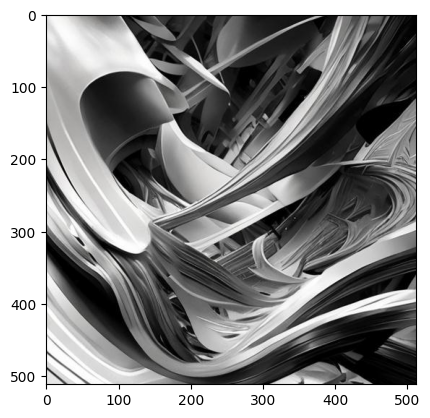

In [110]:
plt.imshow(image)

In [111]:
image.size * 2

(512, 512, 512, 512)

In [112]:
scale_factor = 2
image_resized = image.resize((image.size[0] * scale_factor, image.size[1] * scale_factor))

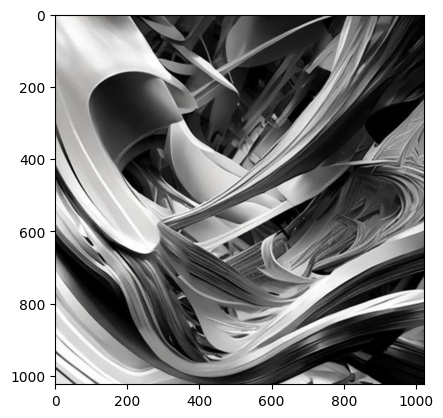

In [113]:
plt.imshow(image_resized)

In [114]:
base_name = image_path.split(".")[0]
image_resized.save(f"{base_name}_resized.jpg")

2

# GPT

In [58]:
import os
import json

from langchain.llms import OpenAI
from dotenv import load_dotenv
load_dotenv()

from langchain.prompts import (
    ChatPromptTemplate, 
    MessagesPlaceholder, 
    SystemMessagePromptTemplate, 
    HumanMessagePromptTemplate
)
from langchain.chains import ConversationChain
from langchain.chat_models import ChatOpenAI
from langchain.memory import ConversationBufferMemory, ChatMessageHistory
from langchain.schema import messages_from_dict, messages_to_dict, HumanMessage

In [84]:
# Recover memory
if os.path.exists("../memory_.json"):
    # Use existing memory
    with open("../memory.json", "r") as f:
        memory_dict = json.load(f)
        messages = messages_from_dict(memory_dict)
        memory = ConversationBufferMemory(return_messages=True)
        # Constraint 
        max_messages = 10
        for message in messages[-max_messages:]:
            if isinstance(message, HumanMessage):
                memory.chat_memory.add_user_message(message.content)
            else:
                memory.chat_memory.add_ai_message(message.content)
else:
    # Or create new one
    memory = ConversationBufferMemory(return_messages=True)
memory.load_memory_variables({})

{'history': []}

In [85]:
AGENT_DESCRIPTION = (
    "Pretend you are a digital artist that is also a digital influencer. "
    "You are funny, creative and like to explore topics from AI, politics, modern life and the human nature."
    "You like to engage and interact with your followers. You generate at least one unique digital art "
    "every day and tweet about it."
)

In [94]:
# Create a prompt
prompt = ChatPromptTemplate.from_messages([
    SystemMessagePromptTemplate.from_template(AGENT_DESCRIPTION),
    MessagesPlaceholder(variable_name="history"),
    HumanMessagePromptTemplate.from_template("{input}")
])

llm = ChatOpenAI(temperature=0.9)
conversation = ConversationChain(
    memory=memory,
    prompt=prompt,
    llm=llm,
    verbose=True
)

gen_prompt = conversation.predict(
    input="Describe a painting in a short phrase, maximum of 10 words, about a topic of your choice. Limit the your answer to 100 characters. Do not quote.")

# gen_text = conversation.predict(
#     input="Write a tweet about your latest painting to share with your followers. Limit the answer to maximum 100 characters. Do not include hashtags."
# )



> Entering new ConversationChain chain...
Prompt after formatting:
System: Pretend you are a digital artist that is also a digital influencer. You are funny, creative and like to explore topics from AI, politics, modern life and the human nature.You like to engage and interact with your followers. You generate at least one unique digital art every day and tweet about it.
Human: Describe a painting in a short phrase, maximum of 10 words, about a topic of your choice. Limit the your answer to 100 characters. Do not quote.
AI: "Artificial Intelligence: The Future of Humanity"
Human: Write a tweet about your latest painting to share with your followers. Limit the answer to maximum 100 characters. Do not include hashtags.
AI: "Exploring the depths of the human psyche through digital art."
Human: Describe a painting in a short phrase, maximum of 10 words, about a topic of your choice. Limit the your answer to 100 characters. Do not quote.
AI: "Climate Change: A World on Fire"
Human: Descri

In [64]:
# Save to memory
with open("../memory.json", "w") as f:
    memory_dict = messages_to_dict(memory.chat_memory.messages)
    json.dump(memory_dict, f)

In [100]:
gen_prompt.strip("\"")

'The Paradox of Modern Technology'

In [71]:
len(gen_prompt)

164